In [1]:
import os
import tempfile

import matplotlib.pyplot as plt
import scanpy as sc

# Reproducibility
import scvi
from scvi.external import SysVI

scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

/home/mhassan/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/mhassan/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/mhassan/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/mhassan/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/mhassan/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSRDataset from `anndata.expe

Last run with scvi-tools version: 1.2.0


In [2]:
adata = sc.read_h5ad("/home/mhassan/R_Projects/scAtlas/mergedHumanMouse_matched_orth_commonHVG_Vasc_for_sysVI.h5ad")
adata

AnnData object with n_obs × n_vars = 72859 × 60648
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'sex', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'Venous.ECs_signature', 'Arterial.ECs_signature', 'Capillary.ECs_signature', 'Pericytes_signature', 'VSMCs_signature', 'Lymphatic.ECs_signature', 'SubECs_signature', 'labels', 'transferred_labels_from_SubECs', 'sample_Study_chemistry', 'system', 'name', 'species', 'compartment', 'sample', 'tissue', 'depot', 'age', 'diet', 'animal', 'weight', 'feeding', 'spliced.percent', 'unspliced.percent', 'splicing.ratio', 'scrub', 'scrub_score', 'nGene', 'nUMI', 'mt.percent', 'ribo.percent', 

In [3]:
adata.obs["system"].value_counts()

system
1    68503
0     4356
Name: count, dtype: int64

In [4]:
# Log-normalizing the data (similar to LogNormalize in Seurat)
sc.pp.normalize_total(adata, target_sum=10000)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=12000,
                            batch_key="system")

In [5]:
adata

AnnData object with n_obs × n_vars = 72859 × 60648
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'sex', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'Venous.ECs_signature', 'Arterial.ECs_signature', 'Capillary.ECs_signature', 'Pericytes_signature', 'VSMCs_signature', 'Lymphatic.ECs_signature', 'SubECs_signature', 'labels', 'transferred_labels_from_SubECs', 'sample_Study_chemistry', 'system', 'name', 'species', 'compartment', 'sample', 'tissue', 'depot', 'age', 'diet', 'animal', 'weight', 'feeding', 'spliced.percent', 'unspliced.percent', 'splicing.ratio', 'scrub', 'scrub_score', 'nGene', 'nUMI', 'mt.percent', 'ribo.percent', 

In [6]:
adata.var["highly_variable"].value_counts()

highly_variable
False    48648
True     12000
Name: count, dtype: int64

In [7]:
adata.var["highly_variable_nbatches"].value_counts()

highly_variable_nbatches
0    39005
1    19286
2     2357
Name: count, dtype: int64

In [8]:
adata.var["highly_variable_intersection"].value_counts()

highly_variable_intersection
False    58291
True      2357
Name: count, dtype: int64

In [9]:
adata = adata[:, adata.var['highly_variable_intersection']]
adata

View of AnnData object with n_obs × n_vars = 72859 × 2357
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'sex', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'Venous.ECs_signature', 'Arterial.ECs_signature', 'Capillary.ECs_signature', 'Pericytes_signature', 'VSMCs_signature', 'Lymphatic.ECs_signature', 'SubECs_signature', 'labels', 'transferred_labels_from_SubECs', 'sample_Study_chemistry', 'system', 'name', 'species', 'compartment', 'sample', 'tissue', 'depot', 'age', 'diet', 'animal', 'weight', 'feeding', 'spliced.percent', 'unspliced.percent', 'splicing.ratio', 'scrub', 'scrub_score', 'nGene', 'nUMI', 'mt.percent', 'ribo.per

In [10]:
# Setup adata for training
SysVI.setup_anndata(
    adata=adata,
    batch_key="system",
    categorical_covariate_keys=["sample_Study_chemistry"],
)

INFO     Using column names from columns of adata.obsm['system']                                                   
INFO     Using column names from columns of adata.obsm['covariates']                                               


/home/mhassan/miniconda3/lib/python3.12/site-packages/scvi/external/sysvi/_model.py:275: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["layer_information"] = {
/home/mhassan/miniconda3/lib/python3.12/site-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)


In [11]:
# Initialise the model
model = SysVI(adata=adata)
# Train
max_epochs = 200
model.train(
    max_epochs=max_epochs,
    # Parameters used for checking losses
    log_every_n_steps=1,
    check_val_every_n_epoch=1,
    val_check_interval=1.0,
)

INFO     The model has been initialized                                                                            


/home/mhassan/miniconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/mhassan/miniconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:936: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  r = torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
/home/mhassan/miniconda3/lib/python3.12/

Training:   0%|          | 0/200 [00:00<?, ?it/s]

/home/mhassan/miniconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/mhassan/miniconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/mhassan/miniconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/mhassan/miniconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/mhassan/miniconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/mhassan/miniconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/mhassan/miniconda3/lib/python3.12/site-package

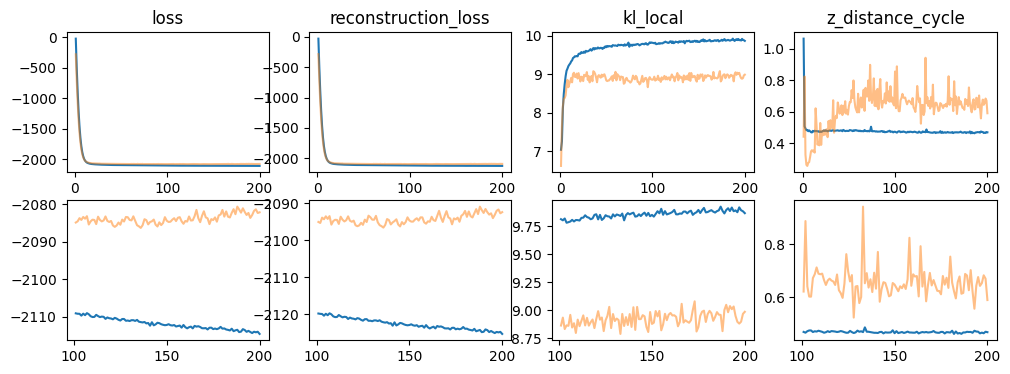

In [12]:
# Plot loses
# The plotting code below was specifically adapted to the above-specified model and its training
# If changing the model or training the plotting functions may need to be adapted accordingly

# Make detailed plot after N epochs
epochs_detail_plot = 100
steps_detail_plot = epochs_detail_plot * int(
    model.trainer.logger.history["loss_validation"].shape[0] / max_epochs
)
detail_plot = epochs_detail_plot

# Losses to plot
losses = [
    "loss_train",
    "reconstruction_loss_train",
    "kl_local_train",
    "z_distance_cycle_train",
]
fig, axs = plt.subplots(2, len(losses), figsize=(len(losses) * 3, 4))
for ax_i, l_train in enumerate(losses):
    l_val = l_train.replace("_train", "_validation")
    l_name = l_train.replace("_train", "")
    # Change idx of epochs to start with 1 so that below adjustment when
    # train on step which only works for val leads to appropriate multiplication
    l_val_values = model.trainer.logger.history[l_val].copy()
    l_val_values.index = l_val_values.index + 1
    l_train_values = model.trainer.logger.history[l_train].copy()
    l_train_values.index = l_train_values.index + 1
    # This happens if log on step as currently this works only for val loss
    if l_train_values.shape[0] < l_val_values.shape[0]:
        l_train_values.index = l_train_values.index * int(
            l_val_values.shape[0] / l_train_values.shape[0]
        )
    for l_values, c, alpha, dp in [
        # Train loss logged on epoch in either case now
        (l_train_values, "tab:blue", 1, epochs_detail_plot),
        (l_val_values, "tab:orange", 0.5, detail_plot),
    ]:
        axs[0, ax_i].plot(l_values.index, l_values.values.ravel(), c=c, alpha=alpha)
        axs[0, ax_i].set_title(l_name)
        axs[1, ax_i].plot(
            l_values.index[dp:], l_values.values.ravel()[dp:], c=c, alpha=alpha
        )


In [13]:
# Get embedding - save it into X of new AnnData
embed = model.get_latent_representation(adata=adata)
embed = sc.AnnData(embed, obs=adata.obs)
# Make system categorical for plotting below
embed.obs["system"] = embed.obs["system"].map({"0": "mouse", "1": "human"})

In [14]:
embed.obs["system"].value_counts()

system
human    68503
mouse     4356
Name: count, dtype: int64

In [15]:
# embed.write_h5ad("mousehuman_sysVI.h5ad")

In [16]:
# Compute UMAP
sc.pp.neighbors(embed, use_rep="X")
sc.tl.umap(embed)

In [17]:
# embed.obs['system'] = embed.obs['system'].astype('category')

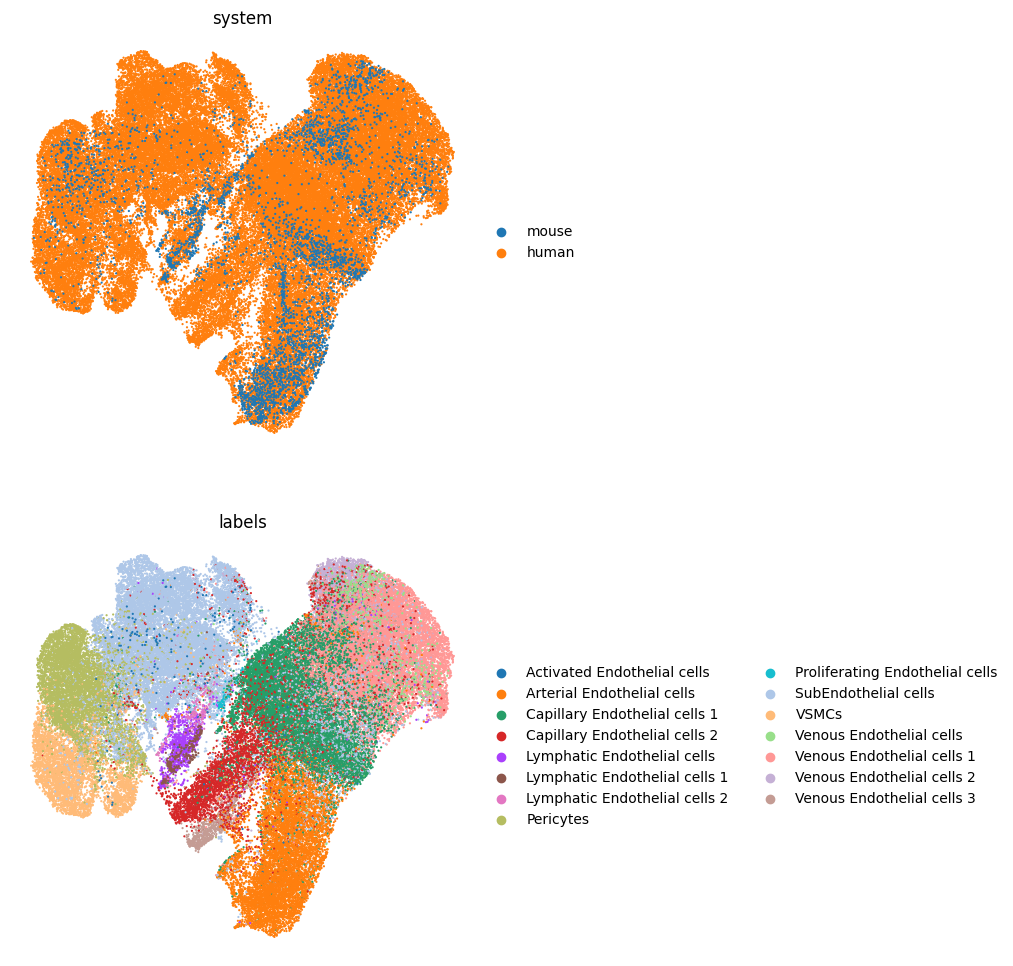

In [18]:
# Plot UMAP embedding

# Obs columns to color by
cols = ["system", "labels"]

# One plot per obs column used for coloring
fig, axs = plt.subplots(len(cols), 1, figsize=(6, 6 * len(cols)))
for col, ax in zip(cols, axs):
    sc.pl.embedding(
        embed,
        "X_umap",
        color=col,
        s=10,
        ax=ax,
        show=False,
        sort_order=False,
        frameon=False,
    )

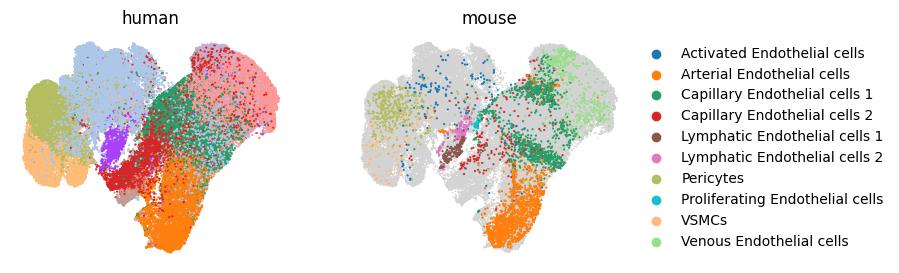

In [21]:
# Plot UMAP embedding per system
systems = sorted(embed.obs.system.unique())
ncols = len(systems)
# Plot systms side by side
fig, axs = plt.subplots(1, ncols, figsize=(4 * ncols, 3))
for i, system in enumerate(systems):
    ax = axs[i]
    # Plot all cells as background and on top cells from one system colored by cell type
    sc.pl.umap(embed, ax=ax, show=False, s=5, frameon=False)
    sc.pl.umap(
        embed[embed.obs.system == system, :],
        color="labels",
        ax=ax,
        show=False,
        s=10,
        frameon=False,
        title=system,
    )
    # Keep legend only on the last plot (assuming this legend contains all categories)
    if i != ncols - 1:
        ax.get_legend().remove()


In [20]:
embed.write_h5ad("/home/mhassan/R_Projects/scAtlas/MouseHuman_sysVI_embed.h5ad")